In [1]:
from pyiron_base import Project
import numpy as np
import pyiron_continuum

2024-05-02 16:26:29,508 - pyiron_log - WARNING - pyiron found a 'templates' folder in the /home/tlakshmi/pyiron/resources resource directory. These are no longer supported in pyiron_base >=0.7.0. They are replaced by Project.create_job_class() and Project.wrap_python_function().


In [2]:
pr = Project('membrane_fenicsx')
pr.remove_jobs(silently=True)

0it [00:00, ?it/s]

In [3]:
job = pr.create.job.Fenicsx('poisson_membrane')

In [4]:
job.geom = job.create.geom.disk(0, 0, 0, 1, 1)
dimensions = 2
min_mesh_length = 0.03
max_mesh_length = 0.03
job.domain = job.create.domain.standardDomain(job.geom, dimensions, min_mesh_length, max_mesh_length)
job.mesh = job.create.get_mesh(job.domain)

Info    : Meshing 1D...
Info    : Meshing curve 1 (Ellipse)
Info    : Done meshing 1D (Wall 0.000241934s, CPU 0s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.119715s, CPU 0.118319s)
Info    : 4201 nodes 8401 elements


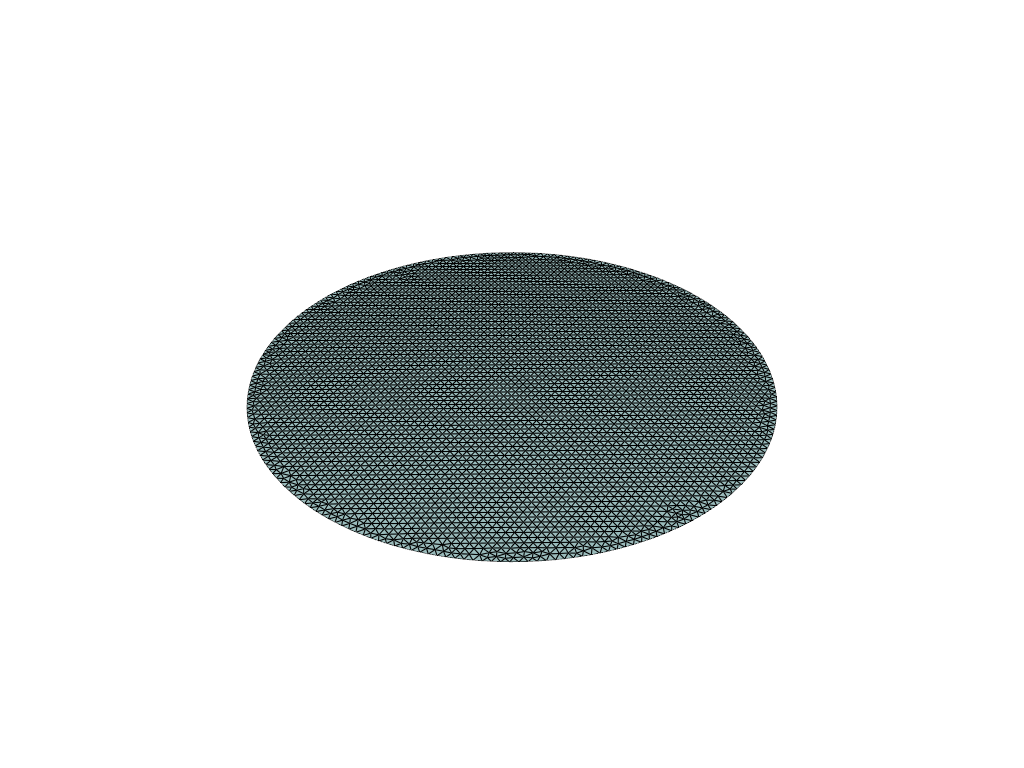

In [5]:
job.V = job.create.V.functionspace(job.mesh, "Lagrange", 1)
job.plot.plot_mesh(job.V)

In [6]:
def on_boundary(x):
    return np.isclose(np.sqrt(x[0]**2 + x[1]**2), 1)

#bc1 = job.create.bc.DirichletBC_functionspace(job.V, on_boundary, 0)
bc1 = job.make_dirichletBC_functionspace(job.V, on_boundary, 0)
job.appendBC(bc1)

In [7]:
x = job.spatial_coord(job.mesh)
beta = job.Constant_scalar(job.mesh, 8)
R0 = job.Constant_scalar(job.mesh, 0.6)
load = 4 * job.Expression(-beta**2 * (x[0]**2 + (x[1] - R0)**2))
job.set_load(load)

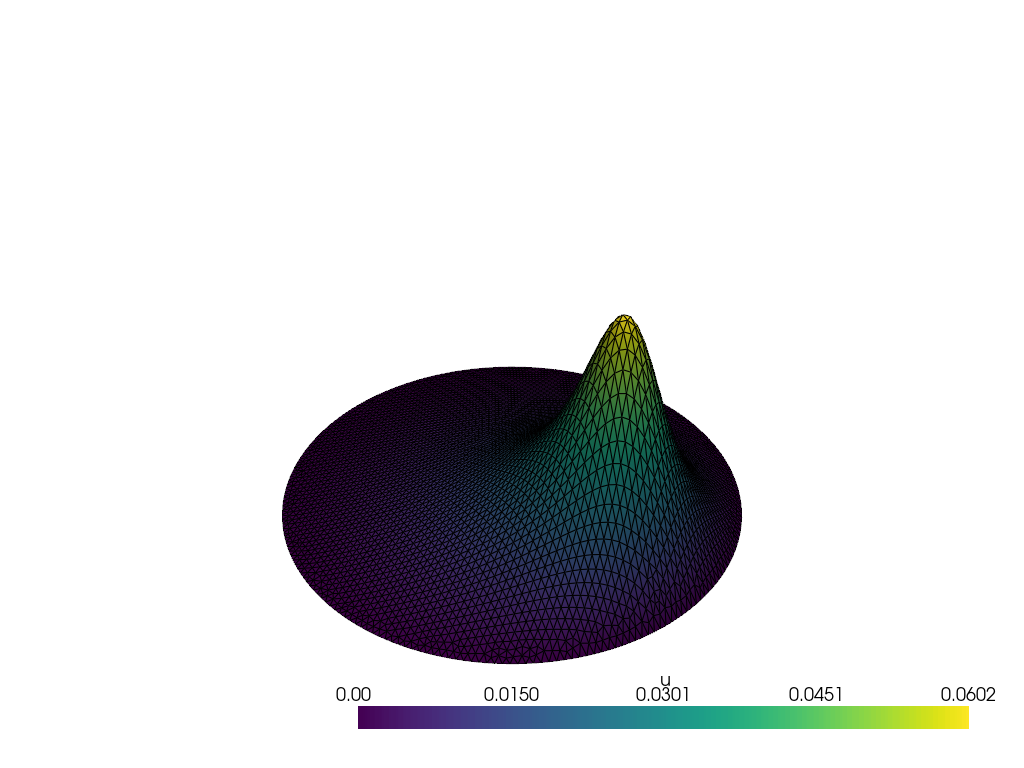

In [8]:
job.solvePoisson()
job.plot.plot_deformed_functionspace(job.V, job.uh, 20)

In [ ]:
#job = pr.create.job.Fenicsx('poisson_membrane')
#job.geom = job.create.geom.disk(0, 0, 0, 1, 1)
#job.domain = job.create.domain.standardDomain(job.geom, 2, 0.03, 0.03)
#job.mesh = job.create.get_mesh(job.domain)
#job.V = job.create.V.functionspace(job.mesh, "Lagrange", 1)
#job.appendBC(job.make_dirichletBC_functionspace(job.V, on_boundary, 0))
#x = job.spatial_coord(job.mesh)
#beta = job.Constant_scalar(job.mesh, 8)
#R0 = job.Constant_scalar(job.mesh, 0.6)
#load = 4 * job.Expression(-beta**2 * (x[0]**2 + (x[1] - R0)**2))
#job.set_load(load)
#job.solvePoisson()